# Homework 6

In this week's class, we learned how to account for the hemodynamic response function in brain responses using convolution. Here, you will get some practice creating stimulus vectors, HRFs, and then using the two of them to create expected response vectors.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nibabel

In [3]:
# Don't change this cell; just run it. 
# The result will give you directions about how to log in to the submission system, called OK.
# Once you're logged in, you can run this cell again, but it won't ask you who you are because
# it remembers you. However, you will need to log in once per assignment.
from client.api.notebook import Notebook
ok = Notebook('hw6.ok')
_ = ok.auth(inline=True)

Assignment: HW 6
OK, version v1.12.5



In [5]:
import os
if not os.path.exists("/home/jovyan/motorloc_experimental_conditions.npy"):
    import urllib
    _ = urllib.request.urlretrieve("https://berkeley.box.com/shared/static/11vkk1at6nb8dnk2k0ksi843g8rh4to5.npy",
                                      "/home/jovyan/motorloc_experimental_conditions.npy")
if not os.path.exists("/home/jovyan/mystery_voxels.npy"):
    import urllib
    _ = urllib.request.urlretrieve("https://berkeley.box.com/shared/static/96gjypxhm2qrxxad42a07elmn905yqfx.npy",
                                      "/home/jovyan/mystery_voxels.npy")

    

**1.** **Convolutions**

In this exercise, you will implement a convolution function which you will then use to convolve stimulus vectors with a hemodynamic response function to create response vectors.

**(a)** [0.5pts] You will start by creating an HRF and plotting it. Use the function `create_hrf` which we used in class (use the import below) to create a hemodynamic response function for `TR=2`, and a `time_length=32` seconds. Call it `hrf`. This should lead to an hrf array of length 16 (make sure it has this length, and double-check the `oversampling` parameter if it doesn't.). Create a figure of size `(20, 4)` called `fig_hrf` and plot the HRF into it. Make the x-axis correspond to the correct time in seconds of each point of the HRF, and label the x-axis as `time (seconds)`. Label the y-axis as `hemodynamic response level`.

In [6]:
## HRF import
from nistats.hemodynamic_models import glover_hrf as create_hrf

In [7]:
hrf = create_hrf(tr=2, time_length=32, oversampling=1)

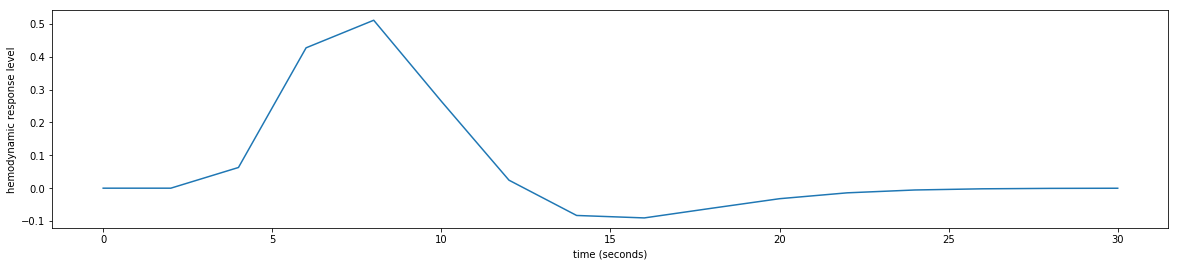

In [8]:
fig_hrf = plt.figure(figsize=(20, 4))
time = np.arange(0, 32, 2)
plt.plot(time, hrf)
plt.xlabel("time (seconds)")
plt.ylabel("hemodynamic response level")

**(b)** [1pt] Next you need to create a stimulus time series to convolve with the hrf we just created. To do this, you first need to load the relevant condition labels: Load the category labels for the motor localizer out of the file `/home/jovyan/motorloc_experimental_conditions.npy`. Call the array `category_labels`. As in the lecture, use `np.unique` to find the unique labels in this array. Call the output `unique_labels`. The label `'rest'` indicates that no action was performed. This condition should be excluded from further analysis. Make an array `unique_labels_no_rest` containing all `unique_labels` except `rest`. You can do this by masking.

In [9]:
## motor localizer filename
motorloc_filename = '/home/jovyan/motorloc_experimental_conditions.npy'

In [10]:
category_labels = np.load(motorloc_filename)
unique_labels = np.unique(category_labels)
unique_labels_no_rest = unique_labels[unique_labels != 'rest']
print(unique_labels)
print(unique_labels_no_rest)

['move eyes' 'move foot' 'move hand' 'move mouth' 'rest' 'speak']
['move eyes' 'move foot' 'move hand' 'move mouth' 'speak']


**(c)** [0.5pts] Now you'll make a stimulus vector: Make a stimulus vector called `stim_vec_move_eyes` such that it has the value `True` whenever `category_labels` contains `'move eyes'` as an entry and `False` at all other times. Create a figure named `fig_stim_vec_move_eyes`, of size `(20, 2)`, and plot `stim_vec_move_eyes` with the correct time on the x axis (remember: each entry in `category_labels` corresponds to one TR of 2s). Make the `xlabel` say `time (seconds)`.

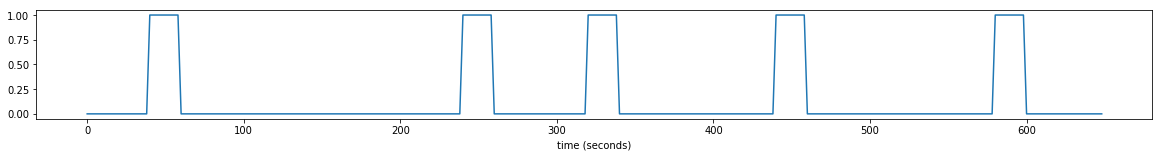

In [11]:
stim_vec_move_eyes = category_labels == 'move eyes'
fig_stim_vec_move_eyes = plt.figure(figsize=(20, 2))
plt.plot(np.arange(len(stim_vec_move_eyes)) * 2, stim_vec_move_eyes)
plt.xlabel("time (seconds)")

**(d)** [1pt] Now you will perform convolution on the stimulus vector and hrf to create a response vector. You will implement convolution slightly differently than we did in class. Instead of making the response vector the same size as the stimulus vector, you will do what `np.convolve` does, and make the response vector long enough to contain the HRF convolved with the last value in the stimulus vector. To do this you will: 

Start by determining the length of the response vector: The length of the response vector will be the sum of the lengths of `stim_vec_move_eyes` and `hrf` **minus 1**. Set `conv_length` to this value. 

Then create a vector of `zeros`, named `resp_vec_move_eyes` that has length `conv_length`. 

Now iterate over the input (stimulus) vector to create the output (response) vector, doing the following: Step through the stimulus vector `stim_vec_move_eyes`, one element at a time. Multiply each element by the hrf and add that product to the response vector starting at the current position and ranging the length of the `hrf`.

In detail: Write a for loop that iterates a loop variable `i` over the range from 0 to the length of `resp_vec_move_eyes`, in which you:
   - extract the current value of `stim_vec_move_eyes` using the for loop variable `i`, and call it `cur_stim`
   - multiply `hrf` by `cur_stim` and call it `cur_response`
   - Use slicing to select the subarray of `resp_vec_move_eyes` that starts at index `i` and ends at `i` plus the length of the `hrf`. Use += to add `cur_response` to that part of the vector you just sliced.


Once you are done with the for loop, create a figure named `fig_convolution`, of size `(20, 2)` and plot `resp_vec_move_eyes` into it.

**Note:** You should see a line plot with the same number of activation bumps as `fig_stim_vec_move_eyes`. If you don't, make absolutely sure you are using `+=`, and not `=` or `+`. The `+=` operator performs an increment of the left hand side by the right hand side.

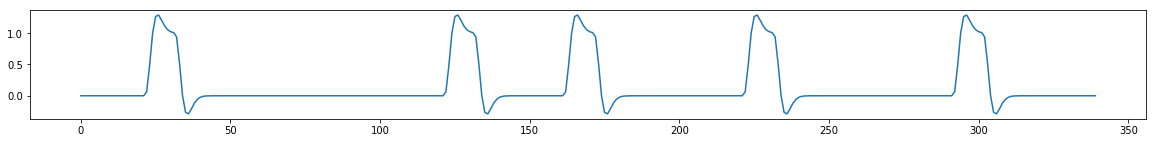

In [12]:
conv_length = len(stim_vec_move_eyes) + len(hrf) - 1
resp_vec_move_eyes = np.zeros(conv_length)

for i in range(0, len(stim_vec_move_eyes)):
    cur_stim = stim_vec_move_eyes[i]
    cur_response = cur_stim * hrf
    resp_vec_move_eyes[i:i + len(cur_response)] += cur_response
    
fig_convolution= plt.figure(figsize=(20, 2))
plt.plot(resp_vec_move_eyes)

**(e)** [1pt] Now you'll put the convolution code you just created into a reusable function. 

Create the function `def convolution(stimulus_vector, impulse_response)`, which implements convolution in the exact same way as in part **(d)**. This amounts to taking the code you wrote above and changing the names to be more general. In the next exercise you will be able to check whether you succeeded in a general manner.

Now use the `convolution` function you just wrote, and convolve the stimulus vector `stim_vec_move_eyes` with `hrf`. Store the resulting response vector into `resp_vec_move_eyes2`. 

Finally, verify that your function does exactly what you did in part **(d)** by using `np.allclose()` to compare `resp_vec_move_eyes` and  `resp_vec_move_eyes2`. Store the result of `np.allclose` into `same1` and print it.

In [13]:
def convolution(stimulus_vector, impulse_response):
    out_length = len(stimulus_vector) + len(impulse_response) - 1
    output_array = np.zeros(out_length)
    for i in range(len(stimulus_vector)):
        output_array[i:i + len(impulse_response)] += stimulus_vector[i] * impulse_response
    return output_array


In [14]:
resp_vec_move_eyes2 = convolution(stim_vec_move_eyes, hrf)

In [15]:
same1 = np.allclose(resp_vec_move_eyes, resp_vec_move_eyes2)
print(same1)

True


**(f)** [0.5 pts] In order to check whether your function works in general, you will now compare the results of using both `convolution` and `np.convolve` to conduct a convolution of a random stimulus vector with a random impulse response to obtain a response vector. To do so:

Make a vector called `random_stimulus_vector` of length `100` and a vector called `random_impulse_response` of length 10 using `np.random.randn` for both vectors. 

Use the function `convolution` to convolve the two and store the output in `my_convolution_output`. 

Then convolve the two vectors using `np.convolve` and store the outputs in `np_convolution_output`. 

Finally, compare these two outputs using `np.allclose` and store the output in `same2`. Print `same2`.

**Note:** This exercise is a check to see whether your implementation is correct. If the two outputs are not exactly the same, then there is an error in your code.

In [16]:
random_stimulus_vector = np.random.randn(100)
random_impulse_response = np.random.randn(10)
my_convolution_output = convolution(random_stimulus_vector, random_impulse_response)
np_convolution_output = np.convolve(random_stimulus_vector, random_impulse_response)
same2 = np.allclose(my_convolution_output, np_convolution_output)
print(same2)

True


**2.** In this exercise, you will create the stimulus vectors and the response vectors for each *motor localizer* category. The **motor localizer** is a block design experiment during which the participant is asked to perform small movements with different body parts, such as hands, feet, eyes, and mouth. Internal speech (forming sentences but not saying them) is also recorded. Up to now you have mostly worked with the visual category localizer, where images of different categories were shown in a block design. The motor localizer is the corresponding experiment for finding motor regions.

You will create a stimulus design matrix from the stimulus vectors and a response design matrix from the response vectors.

**(a)** [0.5pts] In class you learned that it is sometimes useful to pre-allocate an array in memory and then populate it with data. This is especially true for very large arrays. You will practice this here to create a response design matrix. 

To preallocate an array you need to know its size in advance. In this case the response design matrix will have as many rows as `category_labels` has entries (use `len()` to obtain its length) and as many columns as `unique_labels_no_rest` has entries. Create an array of zeros with this many rows and columns and call it `motor_response_design`.

In [17]:
motor_response_design = np.zeros((len(category_labels), len(unique_labels_no_rest)))

**(b)** [0.5 pts] In this part you will create the stimulus vectors for all the motor categories and arrange them in a stimulus design matrix. To do so:

Create an empty list called `stimulus_vectors` to keep the stimulus vectors you create. 

Then, in a for loop that iterates over the unique labels (without "rest"), call the current label `cur_label`. 

Use the `==` operator to create the stimulus vector pertaining to the current label by comparing `category_labels` to `cur_label`, and call it `stimulus_vector`. Append `stimulus_vector` to `stimulus_vectors`. 

After the `for` loop, use `np.stack` to stack the stimulus vectors into columns of a 2D array. Call it `motor_stimulus_design`.

In [18]:
stimulus_vectors = []
for i in range(len(unique_labels_no_rest)):
    cur_label = unique_labels_no_rest[i]
    stimulus_vector = category_labels == cur_label
    stimulus_vectors.append(stimulus_vector)
    
motor_stimulus_design = np.stack(stimulus_vectors, axis=1)

**(c)** [1pt] In this part you will populate the response design matrix with stimulus vectors for all the motor categories. To do so:

Create a for loop with index `i` that iterates over the number of unique labels without rest. 

Select the `i`th stimulus vector from `motor_stimulus_design` and  store it in `stimulus_vector`.

Then create the corresponding response vector by convolving `stimulus_vector` with `hrf`. You can use your own function `convolution` to do this or `np.convolve`. Store the output in `response_vector`. 

Because the output of the convolution is longer than the stimulus vector, and thus longer than a column of `motor_design`, you need to shorten it. Use slicing to make `response_vector` have the same length as `stimulus_vector` by selecting that amount of entries from the beginning of `response_vector` (throw away the end), and call it `response_vector_shortened`.

Finally, store `response_vector_shortened` into the `i`th column of `motor_design`.

In [19]:
for i in range(len(unique_labels_no_rest)):
    stimulus_vector = motor_stimulus_design[:, i]
    response_vector = convolution(stimulus_vector, hrf)
    response_vector_shortened = response_vector[:len(stimulus_vector)]
    motor_response_design[:, i] = response_vector_shortened

**(d)** [0.5 pts] Next let's visualize both design matrices you just created. 

Create a figure named `fig_matrices` of size `(20, 10)`. 

Using `plt.subplot`, plot the response design matrix on the left and the stimulus design matrix on the right, using `plt.imshow` with `aspect='auto'`. 

Make the `xticks` correspond to the unique categories without rest for both matrices. 

Label the y axis as `time (TR)` and the x axis as `motor task`.

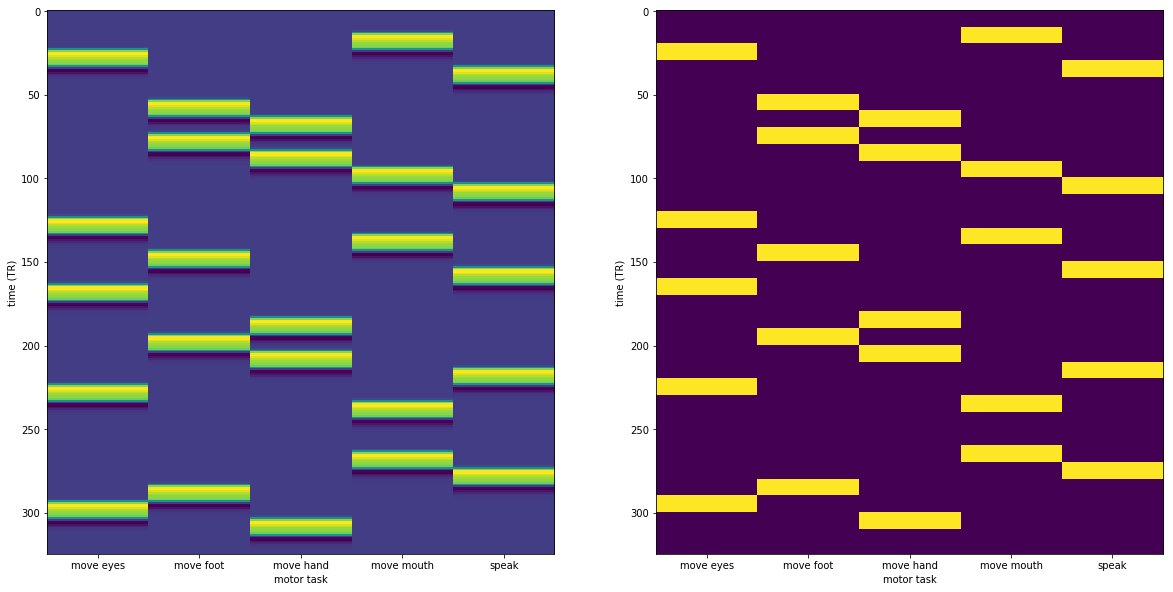

In [21]:
fig_matrices = plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(motor_response_design, aspect='auto')
plt.xticks(np.arange(5), unique_labels_no_rest)
plt.xlabel('motor task')
plt.ylabel('time (TR)')
plt.subplot(1, 2, 2)
plt.imshow(motor_stimulus_design, aspect='auto')
plt.xticks(np.arange(5), unique_labels_no_rest)
plt.xlabel('motor task')
plt.ylabel('time (TR)')


**(e)** [0.5 pts] In order to perform a close-up comparison of stimulus vs response vectors and the lag induces by the hemodynamic response, you will now plot one stimulus vector and one response vector into the same plot.  To do this:

First, create a figure named `fig_move_foot` of size `(20, 2)`. 

Then plot the stimulus vector corresponding to `move_foot` into this figure using `plt.stem` (you can obtain it by selecting the appropriate column of `stimulus_matrix`). 

Next, plot the response vector of `move_foot` into the same figure using `plt.plot` (obtain it by selecting the appropriate column of `motor_design`). 

Finally, label the x axis as `time(TR)`

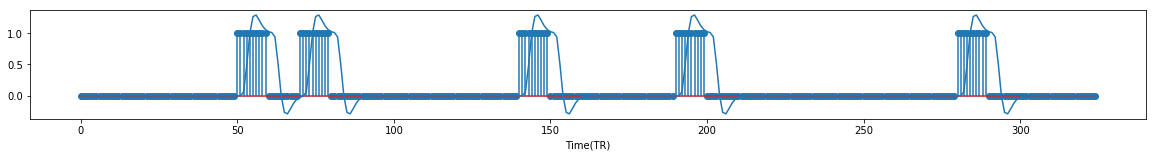

In [19]:
fig_move_foot = plt.figure(figsize=(20, 2))
plt.stem(stimulus_matrix[:, 1])
plt.plot(motor_design[:, 1])
plt.xlabel("Time(TR)")

**3.** In this exercise you will look at some real voxel time courses and assess which task they might be responding to.

**(a)** [1 pt] Load the file `/home/jovyan/mystery_voxels.npy` and store it in `mystery_voxels`. It contains a matrix with 3 columns, where each column contains a voxel time series. Plot the time series from each column in separate figures named `fig_voxel_0`, `fig_voxel_1`, `fig_voxel_2`, all of `figsize=(20, 2)`.

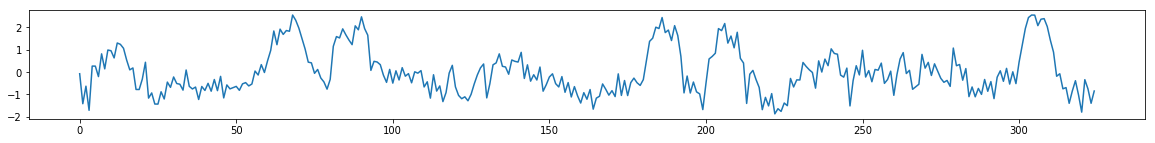

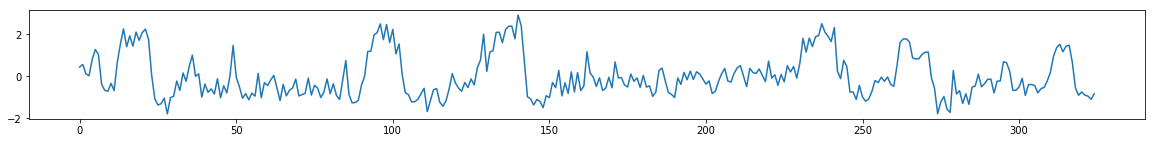

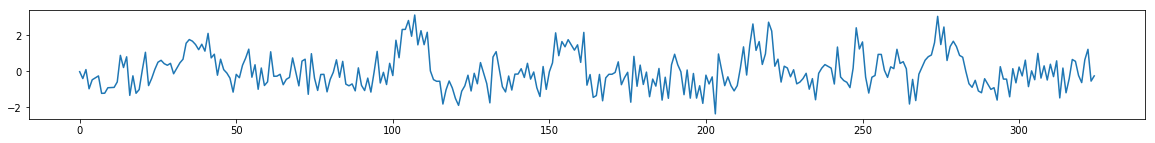

In [20]:
mystery_voxels = np.load("/home/jovyan/mystery_voxels.npy")

fig_voxel_0 = plt.figure(figsize=(20, 2))
plt.plot(mystery_voxels[:, 0])

fig_voxel_1 = plt.figure(figsize=(20, 2))
plt.plot(mystery_voxels[:, 1])

fig_voxel_2 = plt.figure(figsize=(20, 2))
plt.plot(mystery_voxels[:, 2])

**(b)** [0.5 pts] Use `plot_design_matrix_line` from the lecture (included below) to plot the columns of the design matrix as lines into a figure named `fig_design_lines` of size (20, 4).

In [21]:
# From lecture
def plot_design_matrix_line(design_mat, labels):
    num_stim_types = design_mat.shape[1]
    for cur_stim_type in np.arange(num_stim_types):
        cur_y_offset = (cur_stim_type - 1) * 2
        plt.plot(design_mat[:, cur_stim_type] + cur_y_offset, label = labels[cur_stim_type])
    plt.title('Design Matrix')
    plt.xlabel('Time (TRs)')
    _ = plt.legend(bbox_to_anchor=(1, 1))

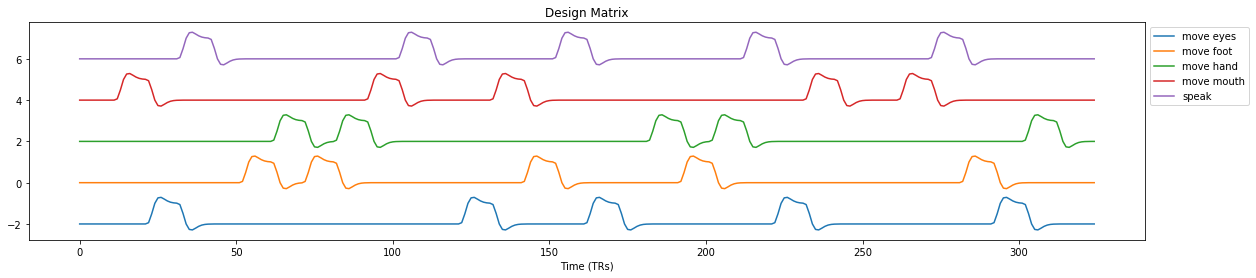

In [25]:
fig_design_lines = plt.figure(figsize=(20, 4))
plot_design_matrix_line(motor_design, unique_labels_no_rest)

**(c)** [0.5 pts] Figure out which column of `motor_design` matches best visually to each one of these plots. Make three more figures named `fig_voxel_XX_resp` where X is from [0,1,2], and plot the 3 voxel time series and the response vector time series that you think best matches each of the 3 mystery voxel time series. Use the figure title to indicate which task label this corresponds to (e.g. "move_eyes" or "move_mouth").

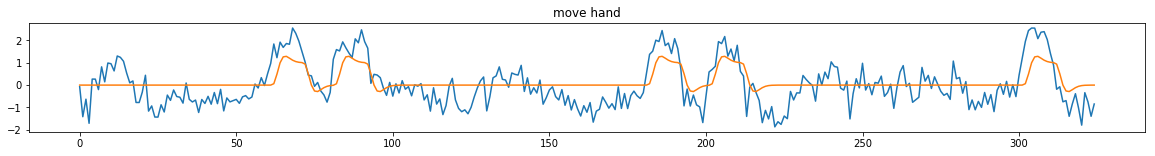

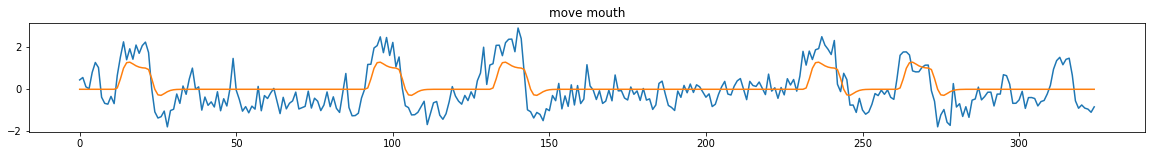

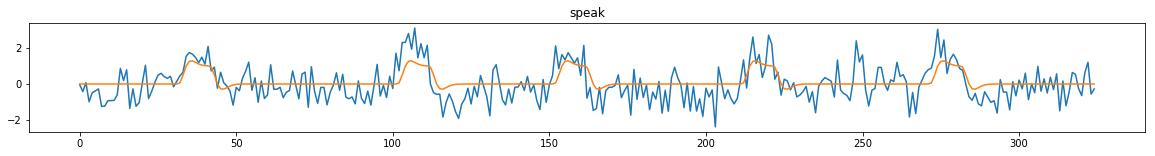

In [23]:
fig_voxel_0 = plt.figure(figsize=(20, 2))
plt.plot(mystery_voxels[:, 0])
plt.plot(motor_design[:, 2])
plt.title('move hand')

fig_voxel_1 = plt.figure(figsize=(20, 2))
plt.plot(mystery_voxels[:, 1])
plt.plot(motor_design[:, 3])
plt.title('move mouth')


fig_voxel_2 = plt.figure(figsize=(20, 2))
plt.plot(mystery_voxels[:, 2])
plt.plot(motor_design[:, 4])
plt.title('speak')


Don't forget to submit the homework when you are done!

In [ ]:
ok.submit()